# Dalle2

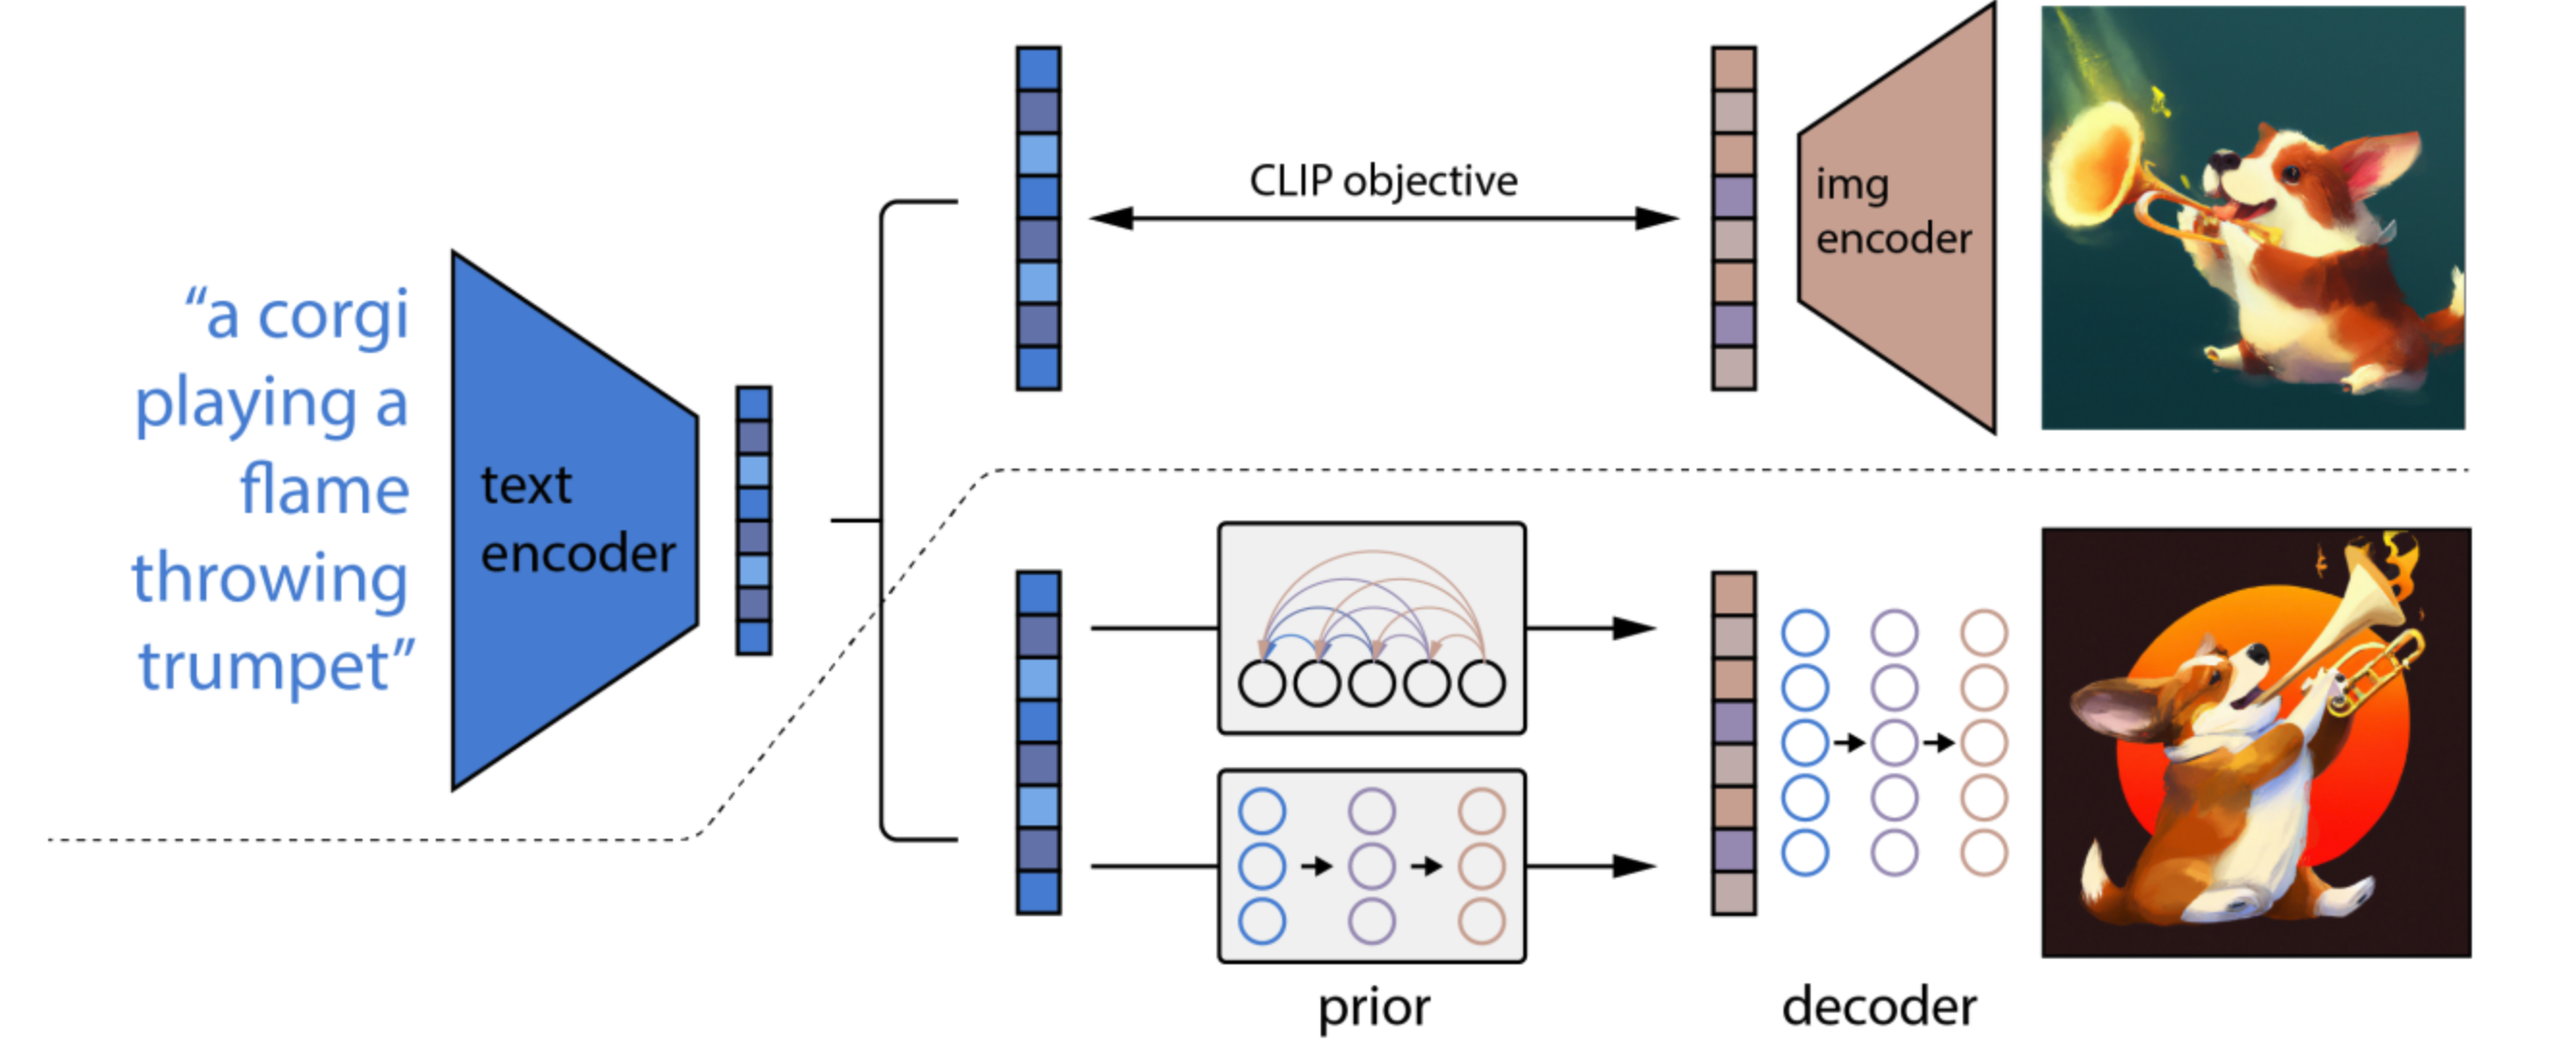

虚线之上的部分是CLIP，这是现成的，不需要训练。Dalle2的主要结构是虚线下面那部分。

1. prior先验模型是diffusion的逆向过程，但这个逆向过程使用到了transformer的decoder, 它的目标是根据文本来生成先验的无噪声图embedding；
2. decoder则是根据先验的无噪声图再生成出图像，decoder是diffusion的逆向过程；
3. prior模型和decoder是需要训练的目标；


## Prior

先验模型是一个transformer的decoder，它的输入包含了text_embeded，text_encodings，时间步长, image_embed（初始是随机生成）。 另外还有一个CLS来与前述特征进行学习。CLS会在transformer中迭代学习，并最终由其采样得到新的image_embed。

text_embeded，text_encodings是由CLIP得到的，前者是CLIP的CLS, 后者代表text中每一个token的特征。

> For the diffusion prior, we train a decoder-only Transformer with a causal attention mask on a sequence consisting of, in order: the encoded text, the CLIP text embedding, an embedding for the diffusion timestep, the noised CLIP image embedding, and a final embedding whose output from the Transformer is used to predict the unnoised CLIP image embedding. 

## Decoder

decoder与Prior结构很类似，内部也包含了transformer,unet等，只是输入的条件是prior的输出以及一个随机噪声；另外一点不同是，它通过cross attention来融合prior的输出和自身的输入，从而实现根据文本生成最终的图像。